In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Senior Year/Machine Learning/Data/RegressionMohsDatasetTrain.csv')

In [ ]:
df

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.000000,4.800000,20.612526,11.088100,2.766000,1.732000,0.860000,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.000000,4.800000,20.298893,12.040830,2.755000,1.631000,0.910000,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.600000,5.600000,33.739258,12.086300,2.828000,1.788000,0.864000,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.000000,4.800000,20.213349,10.948500,2.648000,1.626000,0.936000,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.600000,4.800000,24.988133,11.824480,2.766000,1.682000,0.896000,0.492736,1.86481,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10402,10402,128.0,7.558488,12.000000,4.000000,26.385218,11.330440,2.644000,1.631000,0.892000,0.496070,1.79607,4.0
10403,10403,30.0,1.743160,10.000000,5.333333,20.766935,14.163933,3.090000,1.556667,0.866667,0.480390,0.81480,5.0
10404,10404,196.0,30.920000,24.500000,5.500000,53.490297,10.074300,2.295000,1.545000,1.120000,0.469715,2.11540,1.8
10405,10405,38.0,1.553160,12.666667,4.666667,26.621687,11.290033,2.743333,1.756667,0.980000,0.486507,0.77755,6.0


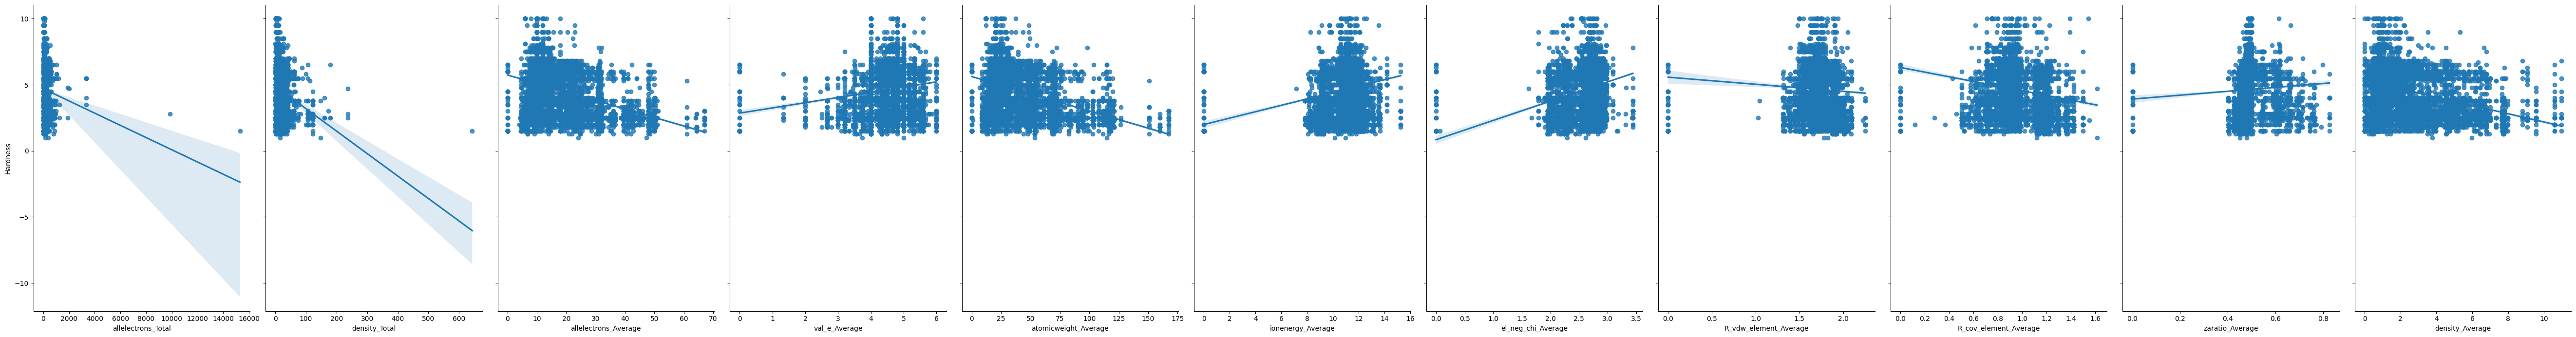

In [ ]:
import seaborn as sns
sns.pairplot(df,x_vars=['allelectrons_Total','density_Total','allelectrons_Average','val_e_Average','atomicweight_Average','ionenergy_Average','el_neg_chi_Average','R_vdw_element_Average','R_cov_element_Average','zaratio_Average','density_Average'], y_vars='Hardness', height=7, aspect=0.7, kind='reg')

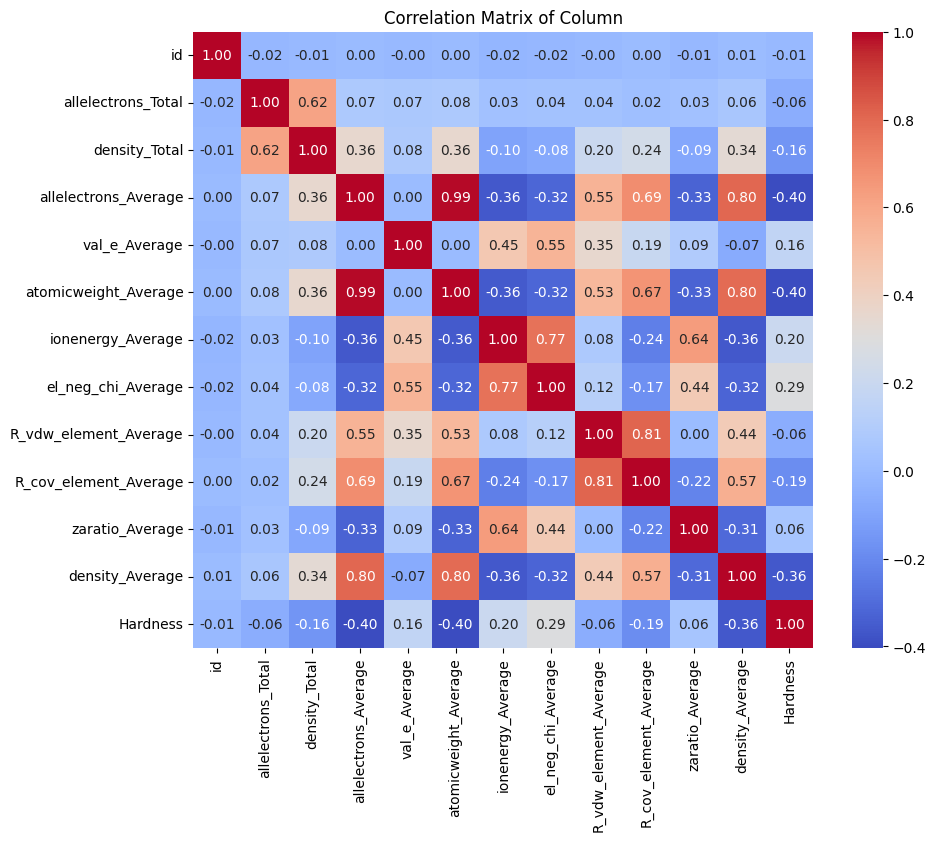

In [ ]:
import matplotlib.pyplot as plt
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Column')
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

reduced_dataset = df.drop(columns=['allelectrons_Total', 'density_Total'])


features_to_consider = correlation_matrix['Hardness'].abs().sort_values(ascending=False)
selected_features = features_to_consider[features_to_consider > 0.2].index.tolist()
selected_features.remove('Hardness')

poly = PolynomialFeatures(degree=3, include_bias=False)
engineered_features = poly.fit_transform(reduced_dataset[selected_features])

engineered_feature_names = poly.get_feature_names_out(selected_features)

engineered_df = pd.DataFrame(engineered_features, columns=engineered_feature_names)

engineered_df.head()

,atomicweight_Average,allelectrons_Average,density_Average,el_neg_chi_Average,ionenergy_Average,atomicweight_Average^2,atomicweight_Average allelectrons_Average,atomicweight_Average density_Average,atomicweight_Average el_neg_chi_Average,atomicweight_Average ionenergy_Average,...,density_Average^3,density_Average^2 el_neg_chi_Average,density_Average^2 ionenergy_Average,density_Average el_neg_chi_Average^2,density_Average el_neg_chi_Average ionenergy_Average,density_Average ionenergy_Average^2,el_neg_chi_Average^3,el_neg_chi_Average^2 ionenergy_Average,el_neg_chi_Average ionenergy_Average^2,ionenergy_Average^3
0,20.612526,10.0,0.91457,2.766,11.08810,424.876216,206.125257,18.851598,57.014246,228.553746,...,0.764981,2.313588,9.274511,6.997152,28.049573,112.442688,21.161991,84.832348,340.068530,1363.237117
1,20.298893,10.0,0.71760,2.755,12.04083,412.045042,202.988926,14.566485,55.923449,244.415515,...,0.369528,1.418687,6.200423,5.446602,23.804576,104.038787,20.910519,91.390201,399.424272,1745.698643
2,33.739258,15.6,1.50633,2.828,12.08630,1138.337530,526.332425,50.822457,95.414622,407.782794,...,3.417908,6.416817,27.424178,12.047001,51.486444,220.042649,22.617168,96.661199,413.110416,1765.550360
3,20.213349,10.0,0.78937,2.648,10.94850,408.579469,202.133488,15.955811,53.524948,221.305849,...,0.491860,1.649982,6.822065,5.534987,22.885121,94.621507,18.567522,76.769831,317.414839,1312.392888
4,24.988133,11.6,1.86481,2.766,11.82448,624.406798,289.862344,46.598121,69.117176,295.471681,...,6.484907,9.618810,41.119822,14.267206,60.991430,260.734615,21.161991,90.466211,386.737493,1653.279014


In [ ]:
engineered_df['density_atomicweight_ratio'] = engineered_df['density_Average'] / engineered_df['atomicweight_Average']
engineered_df['el_neg_chi_ionenergy_interaction'] = engineered_df['el_neg_chi_Average'] * engineered_df['ionenergy_Average']
median_density_atomicweight_ratio = engineered_df['density_atomicweight_ratio'].median()
engineered_df['density_atomicweight_ratio'].fillna(median_density_atomicweight_ratio, inplace=True)
engineered_df.replace([np.inf, -np.inf], np.nan, inplace=True)
engineered_df.fillna(0, inplace=True)
X = engineered_df
y = df['Hardness']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))



In [ ]:
engineered_df

,atomicweight_Average,allelectrons_Average,density_Average,el_neg_chi_Average,ionenergy_Average,atomicweight_Average^2,atomicweight_Average allelectrons_Average,atomicweight_Average density_Average,atomicweight_Average el_neg_chi_Average,atomicweight_Average ionenergy_Average,...,density_Average^2 ionenergy_Average,density_Average el_neg_chi_Average^2,density_Average el_neg_chi_Average ionenergy_Average,density_Average ionenergy_Average^2,el_neg_chi_Average^3,el_neg_chi_Average^2 ionenergy_Average,el_neg_chi_Average ionenergy_Average^2,ionenergy_Average^3,density_atomicweight_ratio,el_neg_chi_ionenergy_interaction
0,20.612526,10.000000,0.91457,2.766000,11.088100,424.876216,206.125257,18.851598,57.014246,228.553746,...,9.274511,6.997152,28.049573,112.442688,21.161991,84.832348,340.068530,1363.237117,0.044370,30.669685
1,20.298893,10.000000,0.71760,2.755000,12.040830,412.045042,202.988926,14.566485,55.923449,244.415515,...,6.200423,5.446602,23.804576,104.038787,20.910519,91.390201,399.424272,1745.698643,0.035352,33.172487
2,33.739258,15.600000,1.50633,2.828000,12.086300,1138.337530,526.332425,50.822457,95.414622,407.782794,...,27.424178,12.047001,51.486444,220.042649,22.617168,96.661199,413.110416,1765.550360,0.044646,34.180056
3,20.213349,10.000000,0.78937,2.648000,10.948500,408.579469,202.133488,15.955811,53.524948,221.305849,...,6.822065,5.534987,22.885121,94.621507,18.567522,76.769831,317.414839,1312.392888,0.039052,28.991628
4,24.988133,11.600000,1.86481,2.766000,11.824480,624.406798,289.862344,46.598121,69.117176,295.471681,...,41.119822,14.267206,60.991430,260.734615,21.161991,90.466211,386.737493,1653.279014,0.074628,32.706512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10402,26.385218,12.000000,1.79607,2.644000,11.330440,696.179729,316.622616,47.389698,69.762516,298.956129,...,36.550498,12.555851,53.806096,230.577438,18.483506,79.208115,339.433734,1454.589091,0.068071,29.957683
10403,20.766935,10.000000,0.81480,3.090000,14.163933,431.265608,207.669354,16.920899,64.169831,294.141489,...,9.403422,7.779792,35.660988,163.462738,29.503629,135.238652,619.906553,2841.525919,0.039235,43.766554
10404,53.490297,24.500000,2.11540,2.295000,10.074300,2861.211927,1310.512289,113.153375,122.760233,538.877304,...,45.081658,11.141865,48.909145,214.695162,12.087822,53.061590,232.923040,1022.456025,0.039547,23.120518
10405,26.621687,12.666667,0.77755,2.743333,11.290033,708.714201,337.208031,20.699692,73.032160,300.559730,...,6.825774,5.851746,24.082531,99.110296,20.645991,84.967411,349.678579,1439.082435,0.029207,30.972325


In [ ]:
test_dataset = pd.read_csv("/content/drive/MyDrive/Senior Year/Machine Learning/Data/RegressionMohnDatasettest.csv")
reduced_dataset = test_dataset.drop(columns=['allelectrons_Total', 'density_Total'])


features_to_consider = correlation_matrix['Hardness'].abs().sort_values(ascending=False)
selected_features = features_to_consider[features_to_consider > 0.2].index.tolist()
selected_features.remove('Hardness')

poly = PolynomialFeatures(degree=3, include_bias=False)
engineered_features = poly.fit_transform(reduced_dataset[selected_features])

engineered_feature_names = poly.get_feature_names_out(selected_features)

engineered_test_df = pd.DataFrame(engineered_features, columns=engineered_feature_names)

engineered_test_df.head()


,atomicweight_Average,allelectrons_Average,density_Average,el_neg_chi_Average,ionenergy_Average,atomicweight_Average^2,atomicweight_Average allelectrons_Average,atomicweight_Average density_Average,atomicweight_Average el_neg_chi_Average,atomicweight_Average ionenergy_Average,...,density_Average^3,density_Average^2 el_neg_chi_Average,density_Average^2 ionenergy_Average,density_Average el_neg_chi_Average^2,density_Average el_neg_chi_Average ionenergy_Average,density_Average ionenergy_Average^2,el_neg_chi_Average^3,el_neg_chi_Average^2 ionenergy_Average,el_neg_chi_Average ionenergy_Average^2,ionenergy_Average^3
0,82.561240,35.36,1.79459,2.298,9.370384,6816.358350,2919.365446,148.163576,189.725730,773.630522,...,5.779573,7.400831,30.177821,9.476878,38.643162,157.572353,12.135288,49.483161,201.773813,822.758099
1,39.568056,18.00,1.41194,2.868,12.086300,1565.631056,712.225008,55.867721,113.481185,478.231395,...,2.814808,5.717572,24.094940,11.613805,48.942794,206.254286,23.590516,99.414942,418.953562,1765.550360
2,23.231818,11.60,0.78834,2.644,11.023840,539.717368,269.489089,18.314571,61.424927,256.103845,...,0.489938,1.643193,6.851096,5.511077,22.977772,95.803057,18.483506,77.064755,321.312228,1339.672689
3,20.298893,10.00,1.20466,2.828,12.086300,412.045042,202.988926,24.453264,57.405268,245.338506,...,1.748209,4.104010,17.539708,9.634370,41.175347,175.975104,22.617168,96.661199,413.110416,1765.550360
4,22.977675,11.00,0.93456,2.455,11.280950,527.973533,252.754421,21.474016,56.410191,259.209999,...,0.816247,2.144203,9.852809,5.632616,25.882389,118.931949,14.796346,67.990568,312.422890,1435.611812


In [ ]:
test_engineered_features = poly.transform(test_dataset[selected_features])

test_engineered_df = pd.DataFrame(test_engineered_features, columns=engineered_feature_names)

test_engineered_df['density_atomicweight_ratio'] = test_engineered_df['density_Average'] / test_engineered_df['atomicweight_Average']
test_engineered_df['el_neg_chi_ionenergy_interaction'] = test_engineered_df['el_neg_chi_Average'] * test_engineered_df['ionenergy_Average']

test_engineered_df.replace([np.inf, -np.inf], np.nan, inplace=True)
test_engineered_df.fillna(0, inplace=True)

test_engineered_df.head()


,atomicweight_Average,allelectrons_Average,density_Average,el_neg_chi_Average,ionenergy_Average,atomicweight_Average^2,atomicweight_Average allelectrons_Average,atomicweight_Average density_Average,atomicweight_Average el_neg_chi_Average,atomicweight_Average ionenergy_Average,...,density_Average^2 ionenergy_Average,density_Average el_neg_chi_Average^2,density_Average el_neg_chi_Average ionenergy_Average,density_Average ionenergy_Average^2,el_neg_chi_Average^3,el_neg_chi_Average^2 ionenergy_Average,el_neg_chi_Average ionenergy_Average^2,ionenergy_Average^3,density_atomicweight_ratio,el_neg_chi_ionenergy_interaction
0,82.561240,35.36,1.79459,2.298,9.370384,6816.358350,2919.365446,148.163576,189.725730,773.630522,...,30.177821,9.476878,38.643162,157.572353,12.135288,49.483161,201.773813,822.758099,0.021736,21.533142
1,39.568056,18.00,1.41194,2.868,12.086300,1565.631056,712.225008,55.867721,113.481185,478.231395,...,24.094940,11.613805,48.942794,206.254286,23.590516,99.414942,418.953562,1765.550360,0.035684,34.663508
2,23.231818,11.60,0.78834,2.644,11.023840,539.717368,269.489089,18.314571,61.424927,256.103845,...,6.851096,5.511077,22.977772,95.803057,18.483506,77.064755,321.312228,1339.672689,0.033934,29.147033
3,20.298893,10.00,1.20466,2.828,12.086300,412.045042,202.988926,24.453264,57.405268,245.338506,...,17.539708,9.634370,41.175347,175.975104,22.617168,96.661199,413.110416,1765.550360,0.059346,34.180056
4,22.977675,11.00,0.93456,2.455,11.280950,527.973533,252.754421,21.474016,56.410191,259.209999,...,9.852809,5.632616,25.882389,118.931949,14.796346,67.990568,312.422890,1435.611812,0.040673,27.694732


In [ ]:
test_engineered_df

,atomicweight_Average,allelectrons_Average,density_Average,el_neg_chi_Average,ionenergy_Average,atomicweight_Average^2,atomicweight_Average allelectrons_Average,atomicweight_Average density_Average,atomicweight_Average el_neg_chi_Average,atomicweight_Average ionenergy_Average,...,density_Average^2 ionenergy_Average,density_Average el_neg_chi_Average^2,density_Average el_neg_chi_Average ionenergy_Average,density_Average ionenergy_Average^2,el_neg_chi_Average^3,el_neg_chi_Average^2 ionenergy_Average,el_neg_chi_Average ionenergy_Average^2,ionenergy_Average^3,density_atomicweight_ratio,el_neg_chi_ionenergy_interaction
0,82.561240,35.360000,1.79459,2.298000,9.370384,6816.358350,2919.365446,148.163576,189.725730,773.630522,...,30.177821,9.476878,38.643162,157.572353,12.135288,49.483161,201.773813,822.758099,0.021736,21.533142
1,39.568056,18.000000,1.41194,2.868000,12.086300,1565.631056,712.225008,55.867721,113.481185,478.231395,...,24.094940,11.613805,48.942794,206.254286,23.590516,99.414942,418.953562,1765.550360,0.035684,34.663508
2,23.231818,11.600000,0.78834,2.644000,11.023840,539.717368,269.489089,18.314571,61.424927,256.103845,...,6.851096,5.511077,22.977772,95.803057,18.483506,77.064755,321.312228,1339.672689,0.033934,29.147033
3,20.298893,10.000000,1.20466,2.828000,12.086300,412.045042,202.988926,24.453264,57.405268,245.338506,...,17.539708,9.634370,41.175347,175.975104,22.617168,96.661199,413.110416,1765.550360,0.059346,34.180056
4,22.977675,11.000000,0.93456,2.455000,11.280950,527.973533,252.754421,21.474016,56.410191,259.209999,...,9.852809,5.632616,25.882389,118.931949,14.796346,67.990568,312.422890,1435.611812,0.040673,27.694732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6934,19.689448,9.636364,0.11548,2.768636,11.045515,387.674368,189.734682,2.273737,54.512922,217.480098,...,0.147299,0.885194,3.531496,14.088953,21.222559,84.667710,337.783063,1347.590458,0.005865,30.581015
6935,36.068500,18.000000,1.35045,1.790000,8.236600,1300.936692,649.233000,48.708706,64.562615,297.081807,...,15.021213,4.326977,19.910378,91.616661,5.735339,26.390890,121.436427,558.783954,0.037441,14.743514
6936,22.688853,11.333333,0.73425,2.876667,10.938358,514.784066,257.140338,16.659291,65.268268,248.178808,...,5.897121,6.076074,23.103918,87.851311,23.805024,90.517224,344.186502,1308.749231,0.032362,31.466011
6937,13.016128,6.666667,0.51227,2.770000,12.700467,169.419597,86.774189,6.667772,36.054675,165.310904,...,3.332863,3.930596,18.021809,82.630101,21.253933,97.449411,446.806134,2048.608814,0.039357,35.180293


In [ ]:
test_predictions = linear_model.predict(test_engineered_df)
ids = range(1, len(test_predictions) + 1)


submission_df = pd.DataFrame({
    "id": ids,
    "Hardness": test_predictions
})


submission_df.to_csv("/content/drive/MyDrive/Senior Year/Machine Learning/Data/KaggleHardnessPrediction.csv", index=False)


In [ ]:
submission_df

,id,Hardness
0,1,3.163446
1,2,4.731216
2,3,5.463862
3,4,4.920708
4,5,5.019071
...,...,...
6934,6935,5.561119
6935,6936,4.194912
6936,6937,5.750523
6937,6938,3.951990
